# **Random Forest Classification**

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Carregamento do conjunto de dados
# Substitua 'kddcup.data_10_percent_corrected' pelo caminho para o seu arquivo de dados
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']  # Liste os nomes das colunas conforme a documentação do KDD Cup 1999
data = pd.read_csv('/content/kddcup.data', header=None, names=column_names)


In [3]:
# Separação das features e do target
X = data.drop('label', axis=1)
y = data['label']

In [4]:
# Codificação binária do target: 'normal' como 0 e 'anomaly' como 1
y = y.apply(lambda x: 0 if x == 'normal.' else 1)

In [5]:
# Identificação dos tipos de dados
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['number']).columns

In [6]:
# Criação do pré-processador com OneHotEncoder para categóricas e StandardScaler para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [7]:
# Criação do pipeline com pré-processamento e RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42))
])

In [8]:
# Avaliação do modelo com validação cruzada de 10 folds
scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 214, in _get_response_values
    y_pred = prediction_method(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 785, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
  

In [9]:
# Exibição dos resultados
print(f'Acurácia média: {scores.mean():.4f}')
print(f'Desvio padrão da acurácia: {scores.std():.4f}')

Acurácia média: nan
Desvio padrão da acurácia: nan


In [10]:
# Treinamento do modelo no conjunto completo de treinamento
pipeline.fit(X, y)

# Previsões no conjunto de treinamento (apenas para demonstração; idealmente, use um conjunto de teste separado)
y_pred = pipeline.predict(X)

# Relatório de classificação e matriz de confusão
print('Relatório de Classificação:')
print(classification_report(y, y_pred))
print('Matriz de Confusão:')
print(confusion_matrix(y, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    972781
           1       1.00      1.00      1.00   3925650

    accuracy                           1.00   4898431
   macro avg       1.00      1.00      1.00   4898431
weighted avg       1.00      1.00      1.00   4898431

Matriz de Confusão:
[[ 972770      11]
 [    192 3925458]]


In [12]:
import joblib

# Salva o modelo treinado
filename = 'intrusion_detection_model.joblib'
joblib.dump(pipeline, filename)

print(f"Modelo salvo como {filename}")

Modelo salvo como intrusion_detection_model.joblib


In [13]:
from sklearn.metrics import classification_report

# ... (código anterior) ...

# Previsões no conjunto de treinamento (apenas para demonstração; idealmente, use um conjunto de teste separado)
y_pred = pipeline.predict(X)

# Relatório de classificação detalhado
report = classification_report(y, y_pred, output_dict=True)

# Extraindo as métricas
recall = report['1']['recall']
f1_score = report['1']['f1-score']
precision = report['1']['precision']
accuracy = report['accuracy']


print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Acurácia: {accuracy:.4f}")


# ... (código restante) ...

Recall: 1.0000
F1-score: 1.0000
Precision: 1.0000
Acurácia: 1.0000


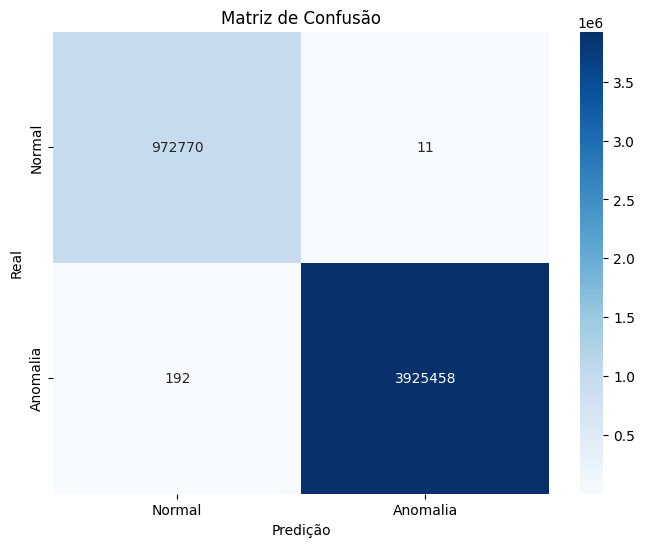

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (código anterior) ...

# Previsões no conjunto de treinamento (apenas para demonstração; idealmente, use um conjunto de teste separado)
y_pred = pipeline.predict(X)

# Matriz de confusão
cm = confusion_matrix(y, y_pred)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Anomalia'],
            yticklabels=['Normal', 'Anomalia'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

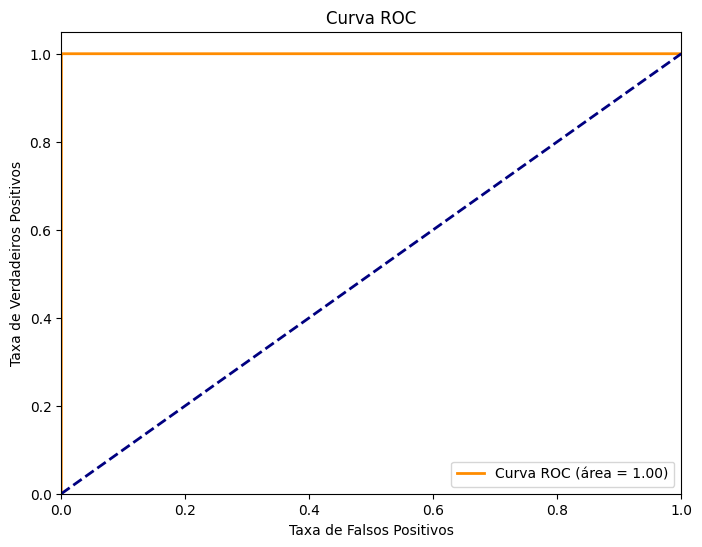

In [ ]:
y_pred_prob = pipeline.predict_proba(X)[:, 1]  # Probabilidades da classe 'anomaly' (classe 1)


# Curva ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


# Distribuição de probabilidades
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_prob[y == 0], kde=True, label='Normal', color='skyblue')
sns.histplot(y_pred_prob[y == 1], kde=True, label='Anomalia', color='salmon')
plt.xlabel('Probabilidade de Anomalia')
plt.ylabel('Contagem')
plt.title('Distribuição de Probabilidades de Anomalia')
plt.legend()
plt.show()

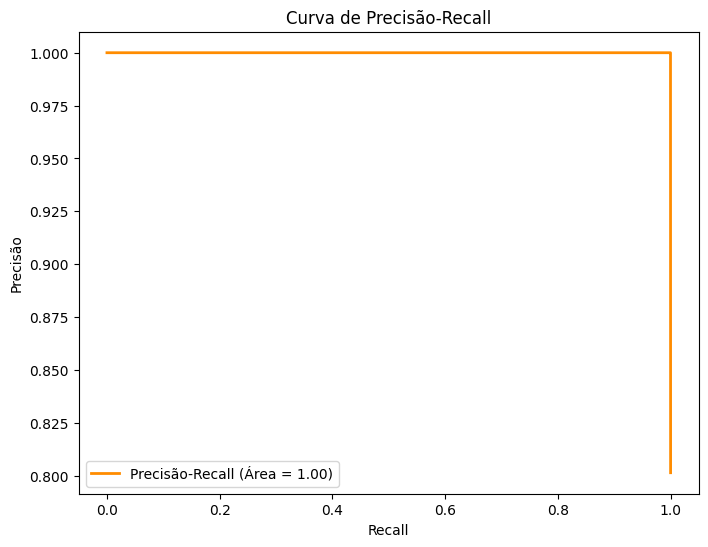

In [5]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Carrega o modelo treinado
filename = '/content/intrusion_detection_model.joblib'
pipeline = joblib.load(filename)

# Carrega os dados (substitua pelo caminho correto para seus dados)
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']
data = pd.read_csv('/content/kddcup.data', header=None, names=column_names)
X = data.drop('label', axis=1)
y = data['label'].apply(lambda x: 0 if x == 'normal.' else 1)


# Previsões
y_pred = pipeline.predict(X)
y_pred_prob = pipeline.predict_proba(X)[:, 1]

# Curva de precisão-recall
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y, y_pred_prob)
average_precision = average_precision_score(y, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precisão-Recall (Área = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva de Precisão-Recall')
plt.legend(loc='lower left')
plt.show()